Using device: cpu


100%|███████████████████████████████████████| 26.4M/26.4M [00:46<00:00, 564kB/s]
100%|███████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 345kB/s]
100%|███████████████████████████████████████| 4.42M/4.42M [00:06<00:00, 716kB/s]
100%|██████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 4.24MB/s]


Epoch 1/20, Loss: 473.5956, Test Accuracy: 84.60%
Epoch 2/20, Loss: 349.4376, Test Accuracy: 86.30%
Epoch 3/20, Loss: 312.4374, Test Accuracy: 86.07%
Epoch 4/20, Loss: 289.5113, Test Accuracy: 86.73%
Epoch 5/20, Loss: 268.7776, Test Accuracy: 87.45%
Epoch 6/20, Loss: 255.3189, Test Accuracy: 88.08%
Epoch 7/20, Loss: 239.5514, Test Accuracy: 88.15%
Epoch 8/20, Loss: 228.9718, Test Accuracy: 87.37%
Epoch 9/20, Loss: 217.4848, Test Accuracy: 87.83%
Epoch 10/20, Loss: 208.3345, Test Accuracy: 88.33%
Epoch 11/20, Loss: 196.2091, Test Accuracy: 87.99%
Epoch 12/20, Loss: 186.9402, Test Accuracy: 88.61%
Epoch 13/20, Loss: 178.5951, Test Accuracy: 88.89%
Epoch 14/20, Loss: 169.5386, Test Accuracy: 88.55%
Epoch 15/20, Loss: 162.2064, Test Accuracy: 88.10%
Epoch 16/20, Loss: 153.3264, Test Accuracy: 88.92%
Epoch 17/20, Loss: 148.5853, Test Accuracy: 88.79%
Epoch 18/20, Loss: 139.7545, Test Accuracy: 88.88%
Epoch 19/20, Loss: 134.8369, Test Accuracy: 88.86%
Epoch 20/20, Loss: 126.6849, Test Accura

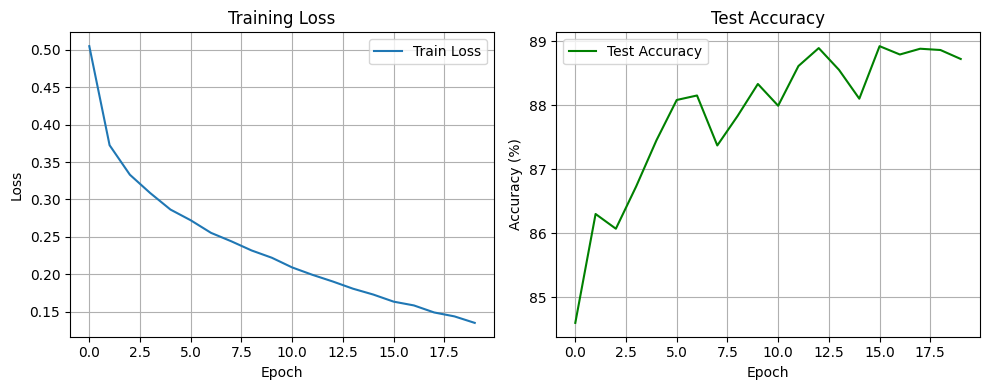

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10) 
        )
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.model(x)
        return x

model = MLP().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
